## Transfer Learning with a Pre-Trained Deep Neural Network

Starting with a large pre-trained network and then re-train only the final layers to adapt to a new task: develop a classifier that can discriminate between two classes: cars and bicycles

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import flickrapi
import requests
from io import BytesIO
%matplotlib inline
import skimage.io
import skimage.transform
import os
import warnings  

# create dataset
api_key = u'e5cdc41d5cab9810e854318edc5452d0'
api_secret = u'67e640fc30ddf83e'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

In [2]:
# create train and test subsets
keyword = ['bicycle', 'car']
dir_name = ['train','test']

bicycle_ts = flickr.walk(text=keyword[0], tag_mode='all', tags=keyword[0],extras='url_c',\
                     sort='relevance',per_page=300)
bicycle_tr = flickr.walk(text=keyword[0], tag_mode='all', tags=keyword[0],extras='url_c',\
                     sort='relevance',per_page=1000)

car_ts = flickr.walk(text=keyword[1], tag_mode='all', tags=keyword[1],extras='url_c',\
                     sort='relevance',per_page=300)
car_tr = flickr.walk(text=keyword[1], tag_mode='all', tags=keyword[1],extras='url_c',\
                     sort='relevance',per_page=1000)

In [3]:
def create_file (dir_name, keyword):
    filename = dir_name+ '/' + keyword
    dir_exists = os.path.isdir(dir_name)
    if not dir_exists:
        os.mkdir(dir_name)
        os.mkdir(filename)
        print(f"Creating directory {dir_name}")
    if not os.path.isdir(filename):
        os.mkdir(filename)
        print(f"Creating sub-directory {dir_name}")
        
    else:
        print(f"Will store images in directory {dir_name}" )
    return

In [4]:
create_file ('train', 'car')
create_file ('test', 'car')
create_file ('train', 'bicycle')
create_file ('test', 'bicycle')

Creating directory train
Will store images in directory train
Creating directory test
Will store images in directory test
Creating sub-directory train
Creating sub-directory test


In [5]:
 def save_files(photos, dir_name,keyword, nimage):
    i = 0
    nrow = 64
    ncol = 64
    filename = dir_name + '/' + keyword

    for photo in photos:
        url=photo.get('url_c')
        if not (url is None):
            response = requests.get(url)
            file = BytesIO(response.content)

            im = skimage.io.imread(file) # Read image from file
            im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant') # Resize images
                
            with warnings.catch_warnings(): # Convert to uint8
                warnings.simplefilter("ignore")
                im2 = skimage.img_as_ubyte(im1)
    
        
            local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(filename,keyword, i)  # Save the image
            skimage.io.imsave(local_name, im2)      
            print(local_name)
            i = i + 1        
        if (i >= nimage):        
            break
    return

In [6]:
for direc in dir_name:
    for key in keyword:
        create_file (direc, key)
        
save_files(bicycle_tr, dir_name[0],keyword[0], 500) # 1000)
save_files(car_tr, dir_name[0],keyword[1], 500)# 1000)
save_files(bicycle_ts, dir_name[1],keyword[0], 150)# 300)
save_files(car_ts, dir_name[1],keyword[1], 150)# 300)

Will store images in directory train
Will store images in directory train
Will store images in directory test
Will store images in directory test
train/bicycle/bicycle_0000.jpg
train/bicycle/bicycle_0001.jpg
train/bicycle/bicycle_0002.jpg
train/bicycle/bicycle_0003.jpg
train/bicycle/bicycle_0004.jpg
train/bicycle/bicycle_0005.jpg
train/bicycle/bicycle_0006.jpg
train/bicycle/bicycle_0007.jpg
train/bicycle/bicycle_0008.jpg
train/bicycle/bicycle_0009.jpg
train/bicycle/bicycle_0010.jpg
train/bicycle/bicycle_0011.jpg
train/bicycle/bicycle_0012.jpg
train/bicycle/bicycle_0013.jpg
train/bicycle/bicycle_0014.jpg
train/bicycle/bicycle_0015.jpg
train/bicycle/bicycle_0016.jpg
train/bicycle/bicycle_0017.jpg
train/bicycle/bicycle_0018.jpg
train/bicycle/bicycle_0019.jpg
train/bicycle/bicycle_0020.jpg
train/bicycle/bicycle_0021.jpg
train/bicycle/bicycle_0022.jpg
train/bicycle/bicycle_0023.jpg
train/bicycle/bicycle_0024.jpg
train/bicycle/bicycle_0025.jpg
train/bicycle/bicycle_0026.jpg
train/bicycle/bic

train/bicycle/bicycle_0260.jpg
train/bicycle/bicycle_0261.jpg
train/bicycle/bicycle_0262.jpg
train/bicycle/bicycle_0263.jpg
train/bicycle/bicycle_0264.jpg
train/bicycle/bicycle_0265.jpg
train/bicycle/bicycle_0266.jpg
train/bicycle/bicycle_0267.jpg
train/bicycle/bicycle_0268.jpg
train/bicycle/bicycle_0269.jpg
train/bicycle/bicycle_0270.jpg
train/bicycle/bicycle_0271.jpg
train/bicycle/bicycle_0272.jpg
train/bicycle/bicycle_0273.jpg
train/bicycle/bicycle_0274.jpg
train/bicycle/bicycle_0275.jpg
train/bicycle/bicycle_0276.jpg
train/bicycle/bicycle_0277.jpg
train/bicycle/bicycle_0278.jpg
train/bicycle/bicycle_0279.jpg
train/bicycle/bicycle_0280.jpg
train/bicycle/bicycle_0281.jpg
train/bicycle/bicycle_0282.jpg
train/bicycle/bicycle_0283.jpg
train/bicycle/bicycle_0284.jpg
train/bicycle/bicycle_0285.jpg
train/bicycle/bicycle_0286.jpg
train/bicycle/bicycle_0287.jpg
train/bicycle/bicycle_0288.jpg
train/bicycle/bicycle_0289.jpg
train/bicycle/bicycle_0290.jpg
train/bicycle/bicycle_0291.jpg
train/bi

train/car/car_0033.jpg
train/car/car_0034.jpg
train/car/car_0035.jpg
train/car/car_0036.jpg
train/car/car_0037.jpg
train/car/car_0038.jpg
train/car/car_0039.jpg
train/car/car_0040.jpg
train/car/car_0041.jpg
train/car/car_0042.jpg
train/car/car_0043.jpg
train/car/car_0044.jpg
train/car/car_0045.jpg
train/car/car_0046.jpg
train/car/car_0047.jpg
train/car/car_0048.jpg
train/car/car_0049.jpg
train/car/car_0050.jpg
train/car/car_0051.jpg
train/car/car_0052.jpg
train/car/car_0053.jpg
train/car/car_0054.jpg
train/car/car_0055.jpg
train/car/car_0056.jpg
train/car/car_0057.jpg
train/car/car_0058.jpg
train/car/car_0059.jpg
train/car/car_0060.jpg
train/car/car_0061.jpg
train/car/car_0062.jpg
train/car/car_0063.jpg
train/car/car_0064.jpg
train/car/car_0065.jpg
train/car/car_0066.jpg
train/car/car_0067.jpg
train/car/car_0068.jpg
train/car/car_0069.jpg
train/car/car_0070.jpg
train/car/car_0071.jpg
train/car/car_0072.jpg
train/car/car_0073.jpg
train/car/car_0074.jpg
train/car/car_0075.jpg
train/car/c

train/car/car_0390.jpg
train/car/car_0391.jpg
train/car/car_0392.jpg
train/car/car_0393.jpg
train/car/car_0394.jpg
train/car/car_0395.jpg
train/car/car_0396.jpg
train/car/car_0397.jpg
train/car/car_0398.jpg
train/car/car_0399.jpg
train/car/car_0400.jpg
train/car/car_0401.jpg
train/car/car_0402.jpg
train/car/car_0403.jpg
train/car/car_0404.jpg
train/car/car_0405.jpg
train/car/car_0406.jpg
train/car/car_0407.jpg
train/car/car_0408.jpg
train/car/car_0409.jpg
train/car/car_0410.jpg
train/car/car_0411.jpg
train/car/car_0412.jpg
train/car/car_0413.jpg
train/car/car_0414.jpg
train/car/car_0415.jpg
train/car/car_0416.jpg
train/car/car_0417.jpg
train/car/car_0418.jpg
train/car/car_0419.jpg
train/car/car_0420.jpg
train/car/car_0421.jpg
train/car/car_0422.jpg
train/car/car_0423.jpg
train/car/car_0424.jpg
train/car/car_0425.jpg
train/car/car_0426.jpg
train/car/car_0427.jpg
train/car/car_0428.jpg
train/car/car_0429.jpg
train/car/car_0430.jpg
train/car/car_0431.jpg
train/car/car_0432.jpg
train/car/c

test/car/car_0053.jpg
test/car/car_0054.jpg
test/car/car_0055.jpg
test/car/car_0056.jpg
test/car/car_0057.jpg
test/car/car_0058.jpg
test/car/car_0059.jpg
test/car/car_0060.jpg
test/car/car_0061.jpg
test/car/car_0062.jpg
test/car/car_0063.jpg
test/car/car_0064.jpg
test/car/car_0065.jpg
test/car/car_0066.jpg
test/car/car_0067.jpg
test/car/car_0068.jpg
test/car/car_0069.jpg
test/car/car_0070.jpg
test/car/car_0071.jpg
test/car/car_0072.jpg
test/car/car_0073.jpg
test/car/car_0074.jpg
test/car/car_0075.jpg
test/car/car_0076.jpg
test/car/car_0077.jpg
test/car/car_0078.jpg
test/car/car_0079.jpg
test/car/car_0080.jpg
test/car/car_0081.jpg
test/car/car_0082.jpg
test/car/car_0083.jpg
test/car/car_0084.jpg
test/car/car_0085.jpg
test/car/car_0086.jpg
test/car/car_0087.jpg
test/car/car_0088.jpg
test/car/car_0089.jpg
test/car/car_0090.jpg
test/car/car_0091.jpg
test/car/car_0092.jpg
test/car/car_0093.jpg
test/car/car_0094.jpg
test/car/car_0095.jpg
test/car/car_0096.jpg
test/car/car_0097.jpg
test/car/c

In [7]:
# Loading a Pre-Trained Deep Network

from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
import tensorflow.keras.backend as K

In [8]:
#Clear the Keras session
K.clear_session()

In [9]:
#Set the dimensions of the input image
nrow = 64
ncol = 64

In [10]:
#Load the VGG16 network
pre_trained = 'vgg16'

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image

if pre_trained == 'vgg16':
    from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input 
else:
    raise Exception("Unknown model")
    
model = VGG16(weights='imagenet')
input_shape = model.input_shape

base_model = VGG16(include_top=False, weights='imagenet',  input_shape=(nrow, ncol, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Create a new model
model = Sequential()

layers= []
for layer in base_model.layers:
    model.add(layer)

In [12]:
for layer in model.layers:
    layer.trainable = False

In [13]:
#Add layers to model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)       295168    
__________

In [15]:
# Using Generators to load data 

# For the total of 1000 train images 500 to each catagorty:

train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
test_data_dir = './test'
batch_size = 32

# For the total of 300 train images 150 to each catagorty:

test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 300 images belonging to 2 classes.


In [17]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

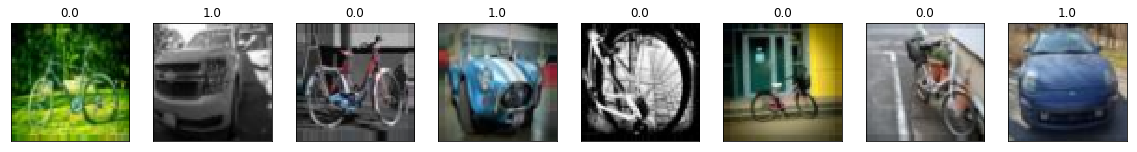

In [39]:
X,y = train_generator.next()

nplot =8
plt.figure(figsize=(20,20))
for i in range(nplot):
    image = X[i]
    label = y[i]
    plt.subplot(1,nplot,i+1)
    plt.title(f'{label}')
    disp_image(image)

In [40]:
# Train the Model

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
steps_per_epoch =  train_generator.n # batch_size
validation_steps =  test_generator.n # batch_size
print(f'Steps per epoch = {steps_per_epoch}, validadtion steps = {validation_steps}')

Steps per epoch = 1000, validadtion steps = 300


In [44]:
# Run the fit (CPU-should get around 90% accuracy after 5 epoch)

nepochs = 5  # Number of epochs

# Call the fit_generator function
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
32/32 [==============================] - 86s 3s/step - loss: 0.6229 - acc: 0.7260 - val_loss: 0.3302 - val_acc: 0.8633
Epoch 2/5
32/32 [==============================] - 86s 3s/step - loss: 0.3883 - acc: 0.8270 - val_loss: 0.2347 - val_acc: 0.9100
Epoch 3/5
32/32 [==============================] - 75s 2s/step - loss: 0.3241 - acc: 0.8600 - val_loss: 0.2887 - val_acc: 0.8667
Epoch 4/5
32/32 [==============================] - 64s 2s/step - loss: 0.3247 - acc: 0.8620 - val_loss: 0.3350 - val_acc: 0.8400
Epoch 5/5
32/32 [==============================] - 65s 2s/step - loss: 0.3044 - acc: 0.8700 - val_loss: 0.1654 - val_acc: 0.9333


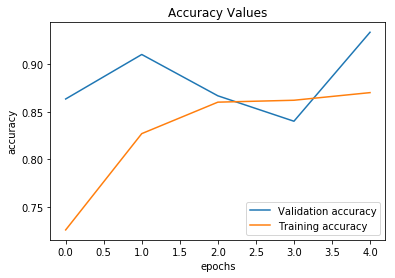

In [48]:
# Plot the training accuracy and validation accuracy curves on the same figure.

plt.plot(hist.history['val_acc'])
plt.plot(hist.history['acc'])
#plt.grid()
plt.title('Accuracy Values')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Validation accuracy', 'Training accuracy'])

In [66]:
# Plotting the Error Images

Xts, yts = test_generator.next()
yhat=np.round(model.predict(Xts))

In [69]:
counter=0
index=[]
for i in range(len(yhat)):
    if yts[i] != yhat[i]:
        counter=counter+1
        index.append(i)
print(f'Total number of error images is {counter}')  

Total number of error images is 2


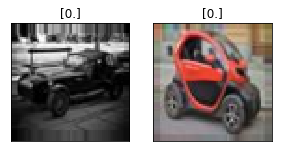

In [70]:
nplop=counter
plt.figure(figsize=(20,20))
for i in range(nplop):
    idx=index[i]
    image = Xts[idx]
    label = yhat[idx]
    plt.subplot(1,nplot,i+1)
    plt.title(f'{label}')
    disp_image(image)